# Equivalent layer technique for estimating total magnetization direction using regular grid

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'regular_EQL_magdirection_RM.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Loading properties of the model

In [6]:
with open('data/model_polyprism.pickle') as f:
        model_polyprism = pickle.load(f)

#### Loading properties grid

In [7]:
with open('data/regular_grid.pickle') as f:
        reg_grid = pickle.load(f)

#### Loading data

In [8]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [9]:
result_RM_reg = dict()

### Saving files

In [10]:
saved_files = []

## Observation area

In [11]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (reg_grid['area'][1], 
                                                                                                reg_grid['area'][0],
                                                                                                reg_grid['area'][3],
                                                                                                reg_grid['area'][2])

Area limits: 
 x_max = 6000.0 m 
 x_min = -6000.0 m 
 y_max = 6000.0 m 
 y_min = -6000.0 m


### reg_grid survey information

In [12]:
print 'Shape : (%.0f,%.0f)'% reg_grid['shape'] 
print 'Number of data: %.1f' % reg_grid['N']
print 'dx: %.1f m' % reg_grid['dx']
print 'dy: %.1f m ' % reg_grid['dy']

Shape : (25,25)
Number of data: 625.0
dx: 500.0 m
dy: 500.0 m 


## Properties of the model

### Main field

In [13]:
inc_gf,dec_gf = model_polyprism['main_field']

In [14]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: 30.0 degree
Main field declination: 40.0 degree


### Magnetization direction

In [15]:
print 'Intensity: %.1f A/m' % model_polyprism['m_R']
print 'Inclination: %.1f degree' % model_polyprism['inc_R']
print 'Declination: %.1f degree' % model_polyprism['dec_R']

Intensity: 5.0 A/m
Inclination: 55.0 degree
Declination: 35.0 degree


In [16]:
inc_R,dec_R = model_polyprism['inc_R'],model_polyprism['dec_R']

## Generating the layer with my function 

In [17]:
h = 900.

#### Generating a layer

In [18]:
shape_layer = (reg_grid['shape'][0],reg_grid['shape'][1])

In [19]:
xs,ys,zs = regular(reg_grid['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [20]:
i_pos = 1500

In [21]:
it_max = 30

In [22]:
it_marq = 15

In [23]:
lamb = 10.
dlamb = 100.

In [24]:
eps_e = 1e-5
eps_i = 1e-5

In [25]:
mu_pos = 1e2

In [26]:
m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
    data['tfa_obs_polyprism_RM_reg'],reg_grid['x'],reg_grid['y'],
    reg_grid['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
    it_marq,eps_e,eps_i,mu_pos)

i = 0
-0.328872426352 -1.30329934569
0.277289187572
i = 1
8.41027139647 2.55129071901
0.582864026117
i = 2
13.3971257674 4.25716926386
0.370430684116
i = 3
16.8559146932 5.57340313758
0.252735185016
i = 4
19.5222798199 6.69435986629
0.196122323651
i = 5
21.6445196149 7.70267867666
0.15590132538
i = 6
23.3926750417 8.63554396443
0.128656802784
i = 7
24.8682056885 9.50947579158
0.108830201271
i = 8
26.1312220925 10.3263313447
0.0927025104242
i = 9
27.2358078832 11.0936023523
0.0810905913154
i = 10
28.2207097118 11.8167591974
0.0728004921074
i = 11
29.1060901588 12.4953107434
0.0656662592336
i = 12
29.9013980282 13.1132807123
0.0591691177091
i = 13
30.6255281548 13.6952421834
0.0536570493421
i = 14
31.2898918588 14.2492221512
0.0491668153722
i = 15
31.9044728889 14.7836786691
0.0456911149273
i = 16
32.4760966455 15.302712118
0.0428125467161
i = 17
33.0104792259 15.8061189038
0.0403419516412
i = 18
33.5111576314 16.2931977326
0.0380255356679
i = 19
33.9811942269 16.7625559324
0.03581116699

47.229611055 34.4522170978
0.000406096251803
i = 159
47.2538755404 34.4855159095
0.000398171926103
i = 160
47.2779207157 34.5183651263
0.000390441202891
i = 161
47.3017500882 34.5507713931
0.000382901227402
i = 162
47.3253684712 34.582744074
0.000375595969424
i = 163
47.3487798406 34.6142895086
0.000368484380616
i = 164
47.3719882578 34.645413979
0.000361565090387
i = 165
47.3949968171 34.6761235069
0.000354810464957
i = 166
47.4178085139 34.7064239326
0.000348214704584
i = 167
47.4404262812 34.7363210008
0.000341773458189
i = 168
47.4628529917 34.7658203623
0.000335482506692
i = 169
47.4850914589 34.7949275754
0.000329337758749
i = 170
47.5071427242 34.8236378732
0.000323245741793
i = 171
47.529007165 34.8519450083
0.00031718488343
i = 172
47.5506875491 34.8798547195
0.000311267608826
i = 173
47.5721865868 34.9073726502
0.000305489945592
i = 174
47.5935069319 34.9345043505
0.000299848043783
i = 175
47.6146511839 34.9612552784
0.000294338171833
i = 176
47.6356218886 34.9876308022
0.000

49.5261120042 36.4875608261
5.01608227864e-05
i = 312
49.5358352326 36.4893992392
4.97057283771e-05
i = 313
49.5455178394 36.4911608419
4.92568664774e-05
i = 314
49.555160123 36.4928464844
4.88141261326e-05
i = 315
49.5647623782 36.4944570069
4.83773987152e-05
i = 316
49.5743248964 36.4959932396
4.79465778803e-05
i = 317
49.583847966 36.4974560029
4.75215594947e-05
i = 318
49.5933318715 36.4988461076
4.71022416131e-05
i = 319
49.6027768948 36.5001643549
4.66885243934e-05
i = 320
49.6121833142 36.5014115365
4.62803100718e-05
i = 321
49.621551405 36.502588435
4.58775029008e-05
i = 322
49.6308814395 36.5036958238
4.54800091121e-05
i = 323
49.6401736868 36.504734467
4.50877368603e-05
i = 324
49.649428413 36.5057051203
4.47005961865e-05
i = 325
49.6586458815 36.5066085301
4.43184989667e-05
i = 326
49.6678263525 36.5074454344
4.39413588764e-05
i = 327
49.6769701453 36.5082167682
4.3569743926e-05
i = 328
49.686077694 36.5089238497
4.32047950908e-05
i = 329
49.6951492475 36.5095673804
4.284448

50.6705245403 36.2239723505
1.82539700933e-05
i = 465
50.6763691578 36.22027851
1.81641625613e-05
i = 466
50.6821980364 36.2165725373
1.80749803554e-05
i = 467
50.6880112483 36.2128544671
1.79865003342e-05
i = 468
50.6938088598 36.2091244176
1.78986526719e-05
i = 469
50.6995909359 36.205382531
1.78114122379e-05
i = 470
50.7053575406 36.2016289483
1.77247730177e-05
i = 471
50.7111087378 36.1978638093
1.76387290825e-05
i = 472
50.716844591 36.1940872523
1.75532745724e-05
i = 473
50.7225651632 36.1902994146
1.74684037125e-05
i = 474
50.728270517 36.1865004321
1.73841107919e-05
i = 475
50.7339607147 36.1826904395
1.73003901809e-05
i = 476
50.7396357539 36.1788699456
1.72167072621e-05
i = 477
50.7452955142 36.1750401446
1.71320897732e-05
i = 478
50.7509400577 36.1712011577
1.70480406118e-05
i = 479
50.7565694503 36.1673531015
1.69645805594e-05
i = 480
50.7621837625 36.1634960884
1.68817340176e-05
i = 481
50.767783055 36.1596302361
1.67994392897e-05
i = 482
50.7733673884 36.1557556612
1.6717

### Visualization of the convergence

In [27]:
phi = (np.array(phi)/reg_grid['x'].size)

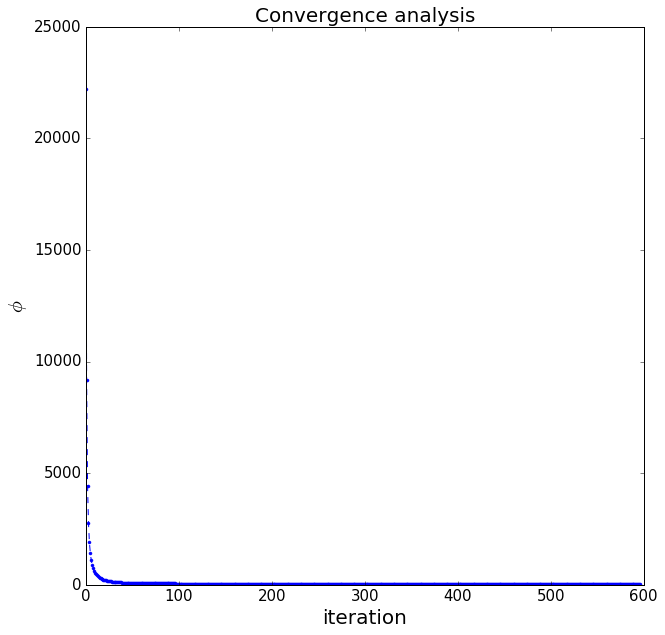

In [28]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.plot(phi, 'b--')
plt.plot(phi, 'b.')

plt.title('Convergence analysis', fontsize=title_font)
plt.xlabel('iteration', fontsize = title_font)
plt.ylabel('$\phi$', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/regular/convergence_LM_NNLS_magRM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Estimated magnetization direction

In [29]:
print (inc_est,dec_est)

(51.320374831317579, 35.687839655088254)


In [30]:
print (inc_R,dec_R)

(55.0, 35.0)


### Comparison between observed data and predicted data

In [31]:
pred = fc.tfa_layer(reg_grid['x'],reg_grid['y'],reg_grid['z'],
                    xs,ys,zs,inc_gf,dec_gf,m_LM,inc_est,dec_est)

In [32]:
res = pred - data['tfa_obs_polyprism_RM_reg']

In [33]:
r_norm,r_mean,r_std = fc.residual(data['tfa_obs_polyprism_RM_reg'],pred)

/home/andrelreis/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


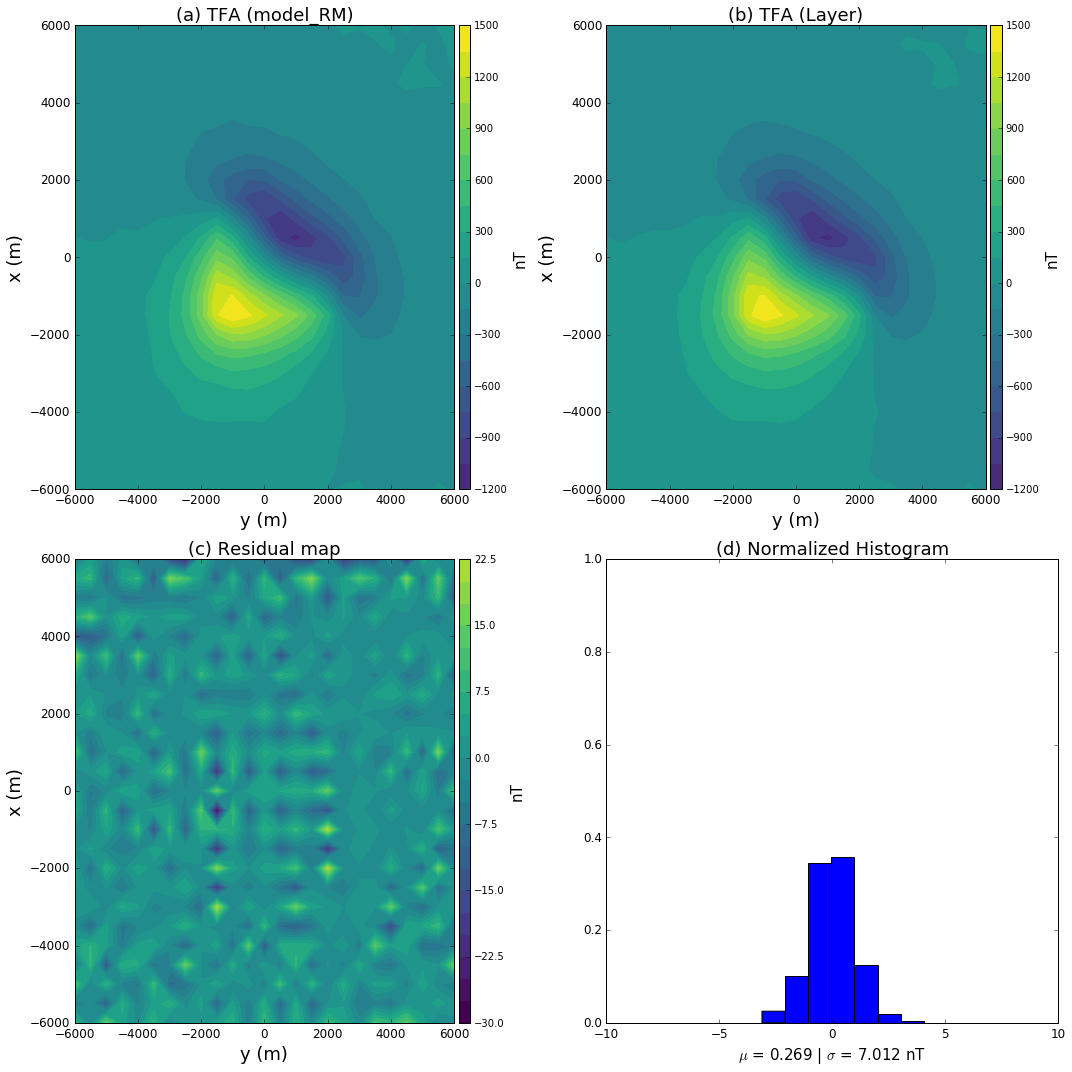

In [34]:
title_font = 18
bottom_font = 15
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(15,15), tight_layout=True)

ranges = saturation_factor*np.abs([data['tfa_obs_polyprism_RM_reg'].max(), 
                                   data['tfa_obs_polyprism_RM_reg'].min(),
                                   pred.max(), pred.min()]).max()
res_ranges = np.max(np.abs(res))

plt.subplot(2,2,1)
plt.contourf(reg_grid['y'].reshape(reg_grid['shape']),
             reg_grid['x'].reshape(reg_grid['shape']), 
             data['tfa_obs_polyprism_RM_reg'].reshape(reg_grid['shape']),
             20, cmap='viridis',vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(a) TFA (model_RM)',fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(2,2,2)
plt.contourf(reg_grid['y'].reshape(reg_grid['shape']),
             reg_grid['x'].reshape(reg_grid['shape']),
             pred.reshape(reg_grid['shape']),
             20, cmap='viridis',  vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(b) TFA (Layer)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(2,2,3)
plt.contourf(reg_grid['y'].reshape(reg_grid['shape']),
             reg_grid['x'].reshape(reg_grid['shape']),
             res.reshape(reg_grid['shape']), 
             20, cmap='viridis',  vmin=-res_ranges, vmax=res_ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(c) Residual map', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)


plt.subplot(2,2,4)
plt.xlabel('$\mu$ = %.3f | $\sigma$ = %.3f nT' % (r_mean, r_std),
           fontsize = bottom_font)
nbins = int((np.max(r_norm - np.min(r_norm))))
plt.hist(r_norm,bins=nbins,normed=True)
plt.ylim(0.,1.)
plt.xlim(-10., 10.)
plt.title('(d) Normalized Histogram',fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

file_name = 'figs/regular/data_fitting_LM_NNLS_magRM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Estimated magnetic moment within the layer

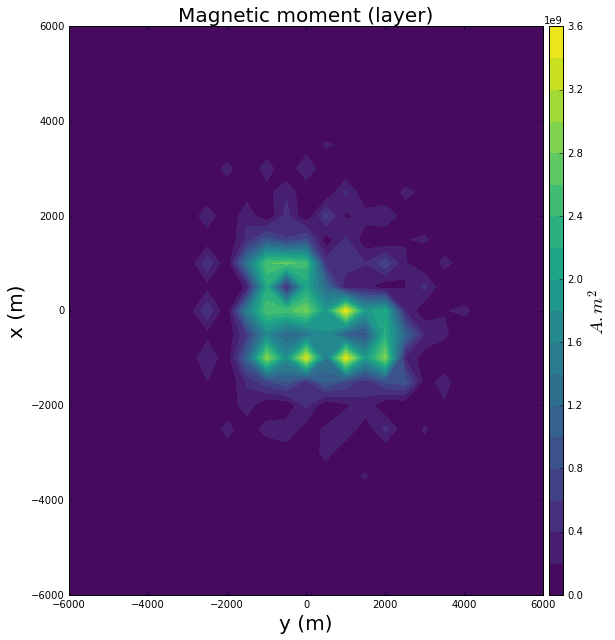

In [35]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.contourf(ys.reshape(shape_layer),xs.reshape(shape_layer), 
             m_LM.reshape(shape_layer), 20, cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('$A.m^2$',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('Magnetic moment (layer)', fontsize=title_font)

file_name = 'figs/regular/magnetic_moment_positive_LM_NNLS_magRM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Reduction to the pole

In [36]:
G_rtp = fc.sensitivity_mag(reg_grid['x'],reg_grid['y'],reg_grid['z'],
                       xs,ys,zs,90.,0.,90.,0.)

In [37]:
tfa_rtp = np.dot(G_rtp,m_LM)

#### Visualization of a reduction to the pole

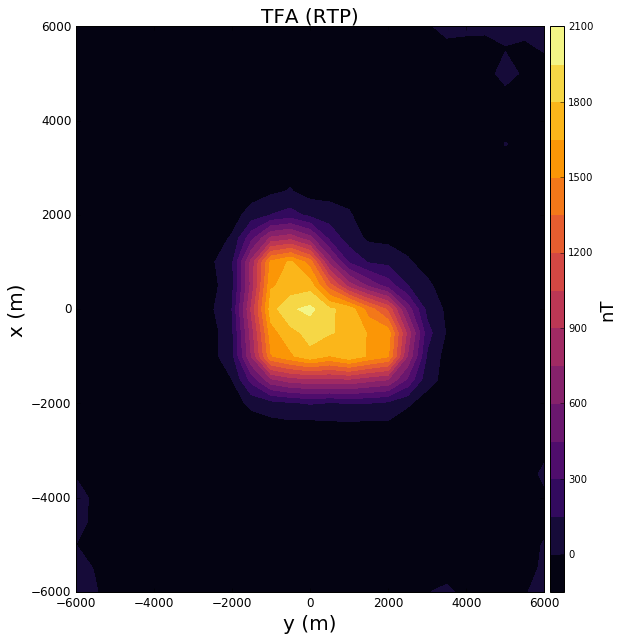

In [38]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.contourf(reg_grid['y'].reshape(reg_grid['shape']), 
             reg_grid['x'].reshape(reg_grid['shape']),
             tfa_rtp.reshape(reg_grid['shape']), 
             20, cmap='inferno')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('TFA (RTP)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

file_name = 'figs/regular/RTP_reg_grid_magRM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

# Visualization of the RTP and Magnetic moment over the layer

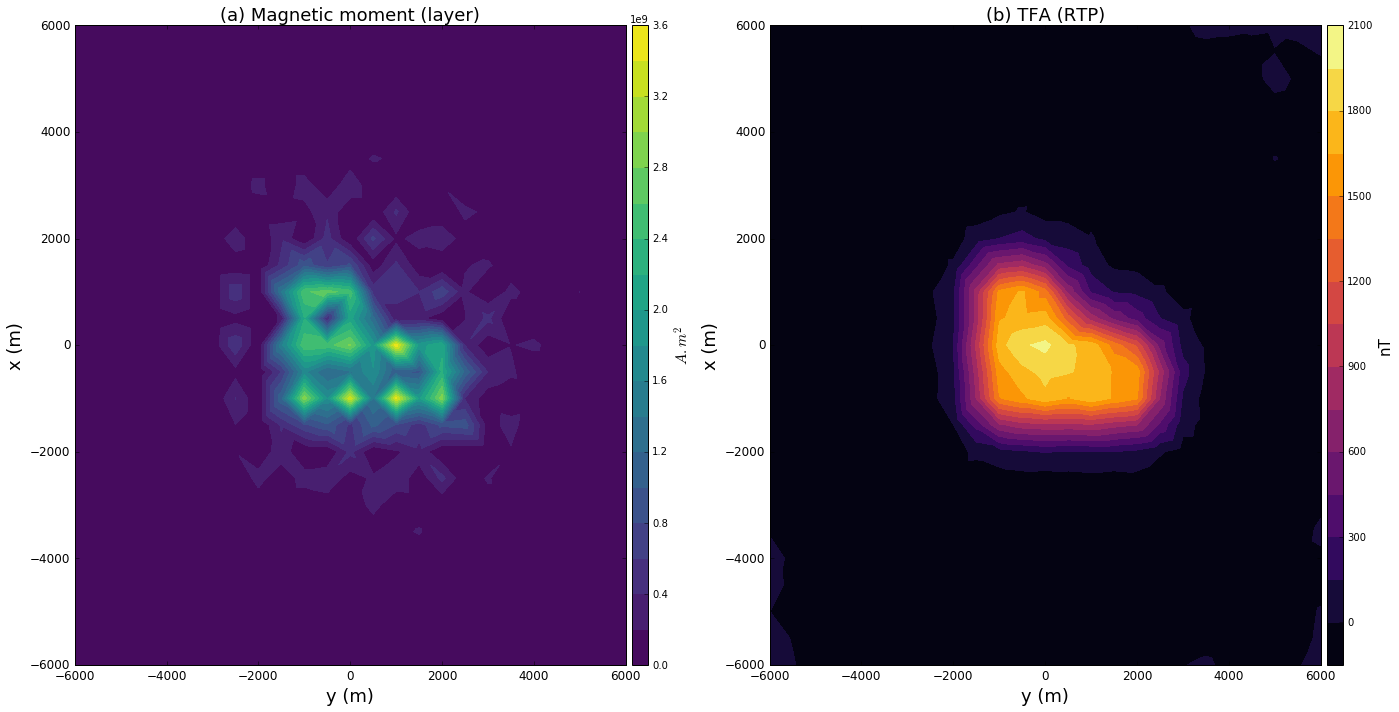

In [39]:
title_font = 18
bottom_font = 15
plt.close('all')
plt.figure(figsize=(20,10), tight_layout=True)

plt.subplot(1,2,1)
plt.tricontourf(ys,xs,m_LM,20,cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('$A.m^2$',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(a) Magnetic moment (layer)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(1,2,2)
plt.tricontourf(reg_grid['y'],reg_grid['x'], tfa_rtp, 20, cmap='inferno')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(b) TFA (RTP)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

file_name = 'figs/regular/RTP_moment_LM_NNLS_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

## Comparison between the RTP Calculated by equivalent layer and the true RTP field

In [40]:
r_rtp = tfa_rtp - data['tfa_obs_polyprism_PL_reg']

In [41]:
r_norm,r_mean,r_std = fc.residual(tfa_rtp,data['tfa_obs_polyprism_PL_reg'])

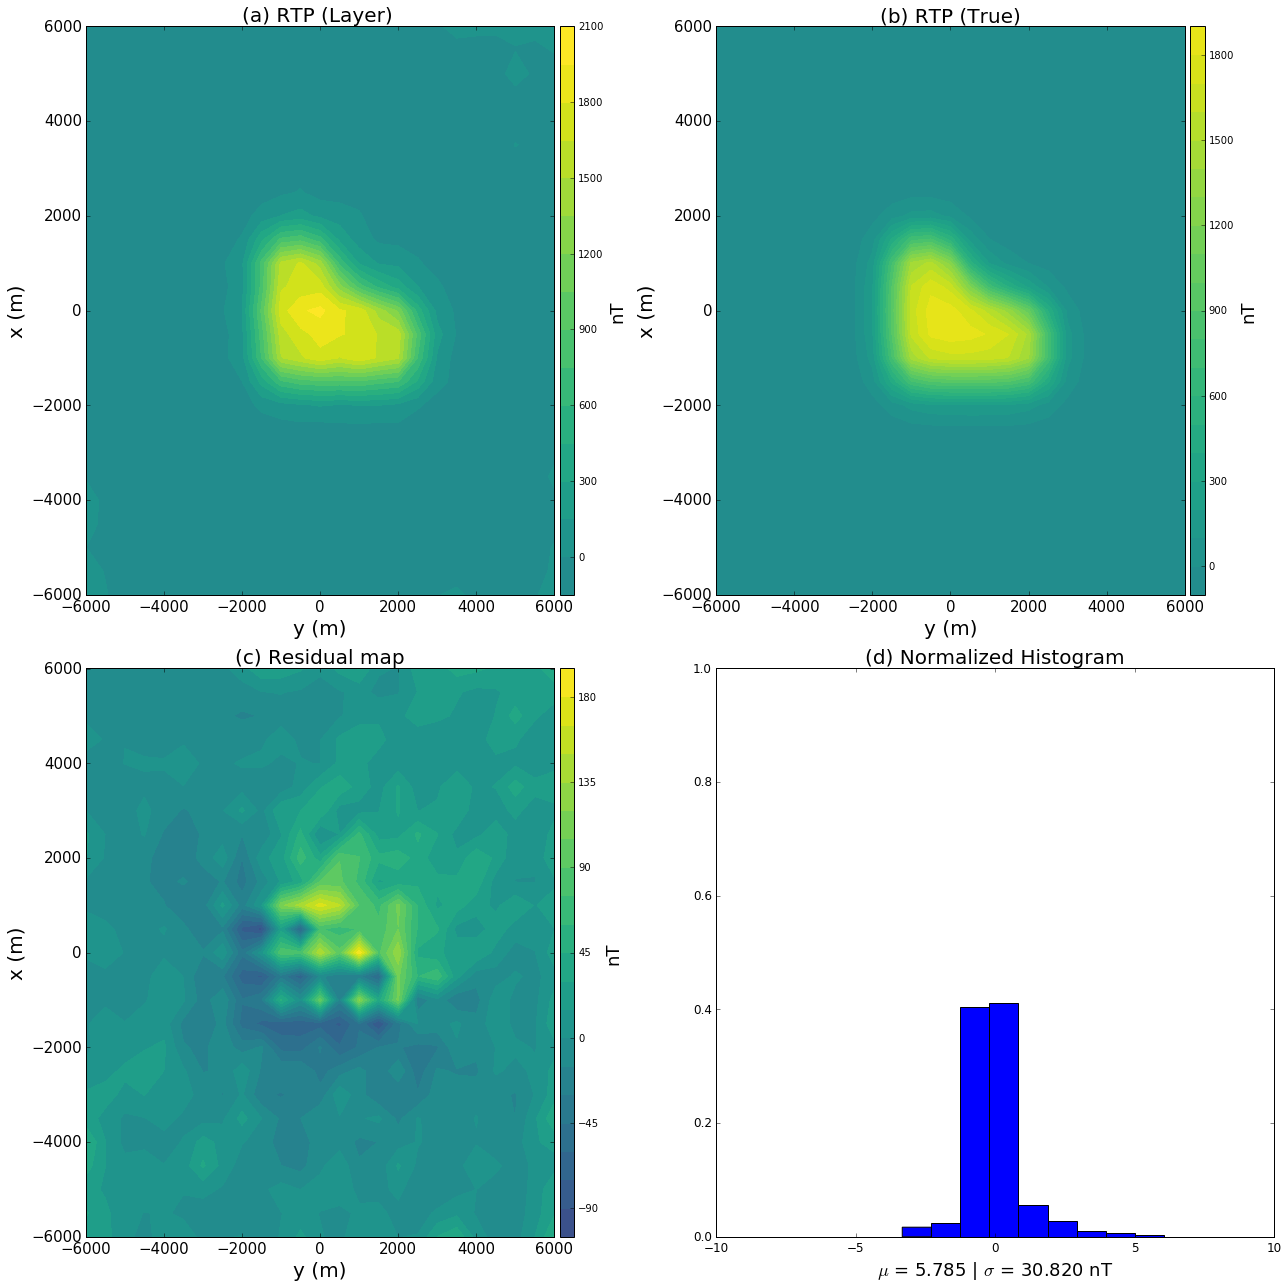

In [42]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(18,18), tight_layout=True)

ranges = saturation_factor*np.abs([tfa_rtp.max(), tfa_rtp.min(),
                                   data['tfa_obs_polyprism_PL_reg'].max(), data['tfa_obs_polyprism_PL_reg'].min()]).max()

r_ranges = saturation_factor*np.abs([r_rtp.max(), r_rtp.min()]).max()


plt.subplot(2,2,1)
plt.contourf(reg_grid['y'].reshape(reg_grid['shape']),
             reg_grid['x'].reshape(reg_grid['shape']), 
             tfa_rtp.reshape(reg_grid['shape']),
             20, cmap='viridis',vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font) 
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(a) RTP (Layer) ', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(2,2,2)
plt.contourf(reg_grid['y'].reshape(reg_grid['shape']),
             reg_grid['x'].reshape(reg_grid['shape']),
             data['tfa_obs_polyprism_PL_reg'].reshape(reg_grid['shape']),
             20, cmap='viridis',  vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(b) RTP (True)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(2,2,3)
plt.contourf(reg_grid['y'].reshape(reg_grid['shape']),
             reg_grid['x'].reshape(reg_grid['shape']),
             r_rtp.reshape(reg_grid['shape']), 
             20, cmap='viridis',  vmin=-r_ranges, vmax=r_ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(c) Residual map', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=15)


plt.subplot(2,2,4)
plt.xlabel('$\mu$ = %.3f | $\sigma$ = %.3f nT' % (r_mean, r_std),
           fontsize = bottom_font)
nbins = int((np.max(r_norm - np.min(r_norm))))
plt.hist(r_norm,bins=nbins,normed=True)
plt.ylim(0.,1.)
plt.xlim(-10., 10.)
plt.title('(d) Normalized Histogram',fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

file_name = 'figs/regular/rtp_layer_true'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

### Results

In [43]:
result_RM_reg['magnetic_moment'] = m_LM
result_RM_reg['inc_est'] = inc_est
result_RM_reg['dec_est'] = dec_est
result_RM_reg['layer_depth'] = h
result_RM_reg['reg_patameter'] = mu_pos
result_RM_reg['RTP'] = tfa_rtp
result_RM_reg['tfa_predicted'] = pred

#### Generating .pickle file

In [44]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_reg['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [45]:
file_name = 'data/result_RM_reg.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_reg, f)
    
saved_files.append(file_name)


### Saved files

In [46]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/regular/convergence_LM_NNLS_magRM.png
2  figs/regular/convergence_LM_NNLS_magRM.eps
3  figs/regular/data_fitting_LM_NNLS_magRM.png
4  figs/regular/data_fitting_LM_NNLS_magRM.eps
5  figs/regular/magnetic_moment_positive_LM_NNLS_magRM.png
6  figs/regular/magnetic_moment_positive_LM_NNLS_magRM.eps
7  figs/regular/RTP_reg_grid_magRM.png
8  figs/regular/RTP_reg_grid_magRM.eps
9  figs/regular/RTP_moment_LM_NNLS_RM.png
10  figs/regular/RTP_moment_LM_NNLS_RM.eps
11  figs/regular/rtp_layer_true.png
12  figs/regular/rtp_layer_true.eps
13  data/result_RM_reg.pickle
